In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
dataset_test = pd.read_csv('tatatest.csv')
training_set = dataset_train.iloc[:,1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [7]:
regressor = Sequential()

regressor.add(LSTM(units= 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0,2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)




Epoch 1/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0120
Epoch 2/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0017
Epoch 3/100
1975/1975 [==============================] - 7s 4ms/step - loss: 0.0016
Epoch 4/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0014
Epoch 5/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0013
Epoch 6/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0014
Epoch 7/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0011
Epoch 8/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0011
Epoch 9/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0010
Epoch 10/100
1975/1975 [==============================] - 7s 3ms/step - loss: 9.8707e-04
Epoch 11/100
1975/1975 [==============================] - 7s 3ms/step - loss: 8.6571e-04
Epoch 12/100
1975/1975 [==============================] - 7s 3ms/

1975/1975 [==============================] - 13s 6ms/step - loss: 2.5041e-04
Epoch 93/100
1975/1975 [==============================] - 12s 6ms/step - loss: 2.1132e-04
Epoch 94/100
1975/1975 [==============================] - 12s 6ms/step - loss: 2.5602e-04
Epoch 95/100
1975/1975 [==============================] - 12s 6ms/step - loss: 2.2444e-04
Epoch 96/100
1975/1975 [==============================] - 12s 6ms/step - loss: 2.3420e-04
Epoch 97/100
1975/1975 [==============================] - 12s 6ms/step - loss: 2.1934e-04
Epoch 98/100
1975/1975 [==============================] - 12s 6ms/step - loss: 2.4658e-04
Epoch 99/100
1975/1975 [==============================] - 12s 6ms/step - loss: 2.5447e-04
Epoch 100/100
1975/1975 [==============================] - 12s 6ms/step - loss: 2.1876e-04


In [8]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


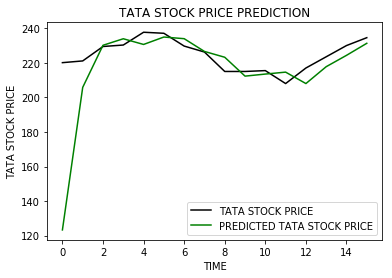

In [9]:
real_stock_price = dataset_test.iloc[:, 1:2].values
plt.plot(real_stock_price, color = 'black', label = 'TATA STOCK PRICE')
plt.plot(predicted_stock_price, color = 'green', label = 'PREDICTED TATA STOCK PRICE')
plt.title('TATA STOCK PRICE PREDICTION')
plt.xlabel('TIME')
plt.ylabel('TATA STOCK PRICE')
plt.legend()
plt.show()